In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

c:\Users\sambh\Desktop\ML-NoteBook


In [56]:
df = pd.read_csv(current_working_directory+"\\Dataset\\Titanic-Dataset\\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [57]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [58]:
print(df.dtypes)
print(df.columns)  # Check all column names


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [59]:
# Select relevant features (Ensure no missing values)
df = df[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Survived']].dropna()

# Convert categorical 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert DataFrame to NumPy array
data = df.values

In [60]:
# Split into states (features) and actions (labels)
states = data[:, :-1]  # All columns except the last (features)
actions = data[:, -1]  # Last column (Survived: 0 or 1)

# Normalize features for stable training
states = (states - states.mean(axis=0)) / states.std(axis=0)
states,actions

(array([[ 0.91123237, -0.53037664, -0.51897787, -0.75905134,  0.52457013,
         -0.50589515],
        [-1.47636364,  0.57183099,  0.69189675,  1.31743394,  0.52457013,
         -0.50589515],
        [ 0.91123237, -0.25482473, -0.50621356,  1.31743394, -0.55170307,
         -0.50589515],
        ...,
        [-1.47636364, -0.73704057, -0.08877362,  1.31743394, -0.55170307,
         -0.50589515],
        [-1.47636364, -0.25482473, -0.08877362, -0.75905134, -0.55170307,
         -0.50589515],
        [ 0.91123237,  0.15850313, -0.50952283, -0.75905134, -0.55170307,
         -0.50589515]]),
 array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.,

In [61]:
# Number of states and actions
num_states = states.shape[1]  # Feature count
num_actions = 2  # Survived (1) or Not Survived (0)

# Initialize Q-table with zeros
Q_table = np.zeros((num_states, num_actions))

# Hyperparameters
learning_rate = 0.5  # Increase for faster learning
discount_factor = 0.9
epsilon_decay = 0.99  # Decay faster to shift to exploitation
reward_correct = 10  # Increase reward for correct predictions
reward_wrong = -10
min_epsilon = 0.01
episodes = 5000


Episode 0, Loss: 25.000000, Epsilon: 0.0100
Episode 100, Loss: 26.112144, Epsilon: 0.0100
Episode 200, Loss: 8.211102, Epsilon: 0.0100
Episode 300, Loss: 27.402334, Epsilon: 0.0100
Episode 400, Loss: 17.239489, Epsilon: 0.0100
Episode 500, Loss: 25.957274, Epsilon: 0.0100
Episode 600, Loss: 13.452102, Epsilon: 0.0100
Episode 700, Loss: 32.155528, Epsilon: 0.0100
Episode 800, Loss: 37.013930, Epsilon: 0.0100
Episode 900, Loss: 12.900839, Epsilon: 0.0100
Episode 1000, Loss: 30.533174, Epsilon: 0.0100
Episode 1100, Loss: 41.584873, Epsilon: 0.0100
Episode 1200, Loss: 25.319328, Epsilon: 0.0100
Episode 1300, Loss: 34.024795, Epsilon: 0.0100
Episode 1400, Loss: 39.116330, Epsilon: 0.0100
Episode 1500, Loss: 28.079831, Epsilon: 0.0100
Episode 1600, Loss: 42.264762, Epsilon: 0.0100
Episode 1700, Loss: 18.427988, Epsilon: 0.0100
Episode 1800, Loss: 18.618853, Epsilon: 0.0100
Episode 1900, Loss: 14.283641, Epsilon: 0.0100
Episode 2000, Loss: 36.307890, Epsilon: 0.0100
Episode 2100, Loss: 18.850

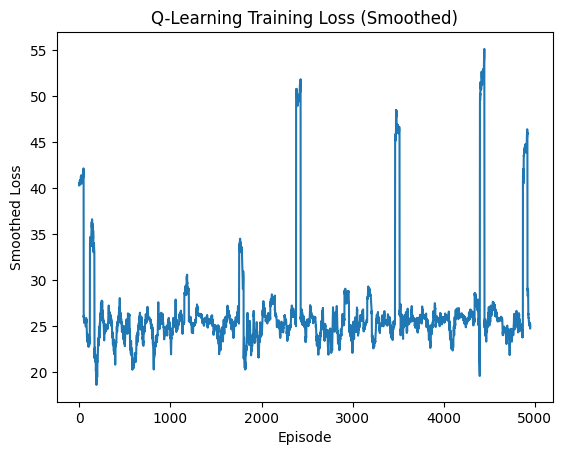

In [62]:
# Loss tracking
losses = []

# Training loop
for episode in range(episodes):
    idx = np.random.randint(len(states))  
    state = states[idx]
    actual_action = int(actions[idx])

    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])  
    else:
        action = np.argmax(Q_table.sum(axis=0))  

    reward = reward_correct if action == actual_action else reward_wrong  

    old_q_value = Q_table[:, action].copy()

    Q_table[:, action] += learning_rate * (reward + discount_factor * np.max(Q_table[:, :]) - Q_table[:, action])

    loss = np.mean((Q_table[:, action] - old_q_value) ** 2)
    losses.append(loss)

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if episode % 100 == 0:
        print(f"Episode {episode}, Loss: {loss:.6f}, Epsilon: {epsilon:.4f}")

# Apply Moving Average to Smooth Loss
window = 50  # Adjust for smoothing effect
smooth_losses = np.convolve(losses, np.ones(window)/window, mode='valid')

plt.plot(smooth_losses)
plt.xlabel("Episode")
plt.ylabel("Smoothed Loss")
plt.title("Q-Learning Training Loss (Smoothed)")
plt.show()

In [63]:
correct = 0
for i in range(len(states)):
    state = states[i]
    action = np.argmax(Q_table.sum(axis=0))  # Best learned action
    correct += int(action == actions[i])

accuracy = (correct / len(states)) * 100
print(f"Agent Accuracy: {accuracy:.2f}%")


Agent Accuracy: 59.38%
